# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# standardize features
scaler_km = StandardScaler()
X_std_km = scaler_km.fit_transform(X)

# create k-mean object
n = 8
cluster_km = KMeans(n_clusters = n, random_state = 0, n_jobs = -1)

#train model
model_km = cluster_km.fit(X_std_km)

'''
I'm not sure if I should've standardize the data.
'''

"\nI'm not sure if I should've standardize the data.\n"

In [6]:
# compute silhouette score
from sklearn.metrics import silhouette_score

preds_ss = cluster_km.fit_predict(X_std_km)
centers_ss = cluster_km.cluster_centers_

score_ss = silhouette_score (X_std_km, preds_ss, metric='euclidean')
print (f"For n_clusters = {n}, silhouette score is {score_ss}")

For n_clusters = 8, silhouette score is 0.15777035021428829


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [15]:
# create k-mean object
n = 5
cluster_km = KMeans(n_clusters = n, random_state = 0,n_jobs = -1)

#train model
model_km = cluster_km.fit(X_std_km)

In [16]:
# compute silhouette score

preds_ss = cluster_km.fit_predict(X_std_km)
centers_ss = cluster_km.cluster_centers_

score_ss = silhouette_score (X_std_km, preds_ss, metric='euclidean')
print (f"For n_clusters = {n}, silhouette score is {score_ss}")

For n_clusters = 5, silhouette score is 0.22964640104552184


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [17]:
# create k-mean object
n = 3
cluster_km = KMeans(n_clusters = n, random_state = 0,n_jobs = -1)

#train model
model_km = cluster_km.fit(X_std_km)

In [18]:
# compute silhouette score

preds_ss = cluster_km.fit_predict(X_std_km)
centers_ss = cluster_km.cluster_centers_

score_ss = silhouette_score (X_std_km, preds_ss, metric='euclidean')
print (f"For n_clusters = {n}, silhouette score is {score_ss}")

For n_clusters = 3, silhouette score is 0.2848589191898987


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

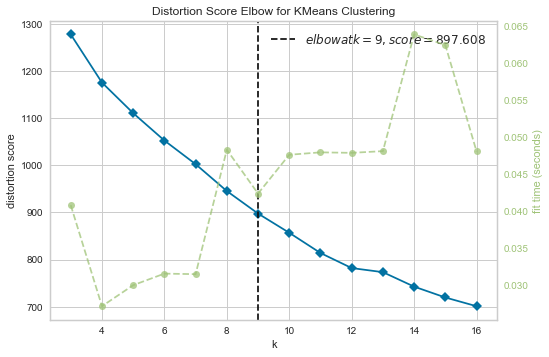

In [20]:
# import libraries
from yellowbrick.cluster import KElbowVisualizer

# plot elbow curve
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(X_std_km)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

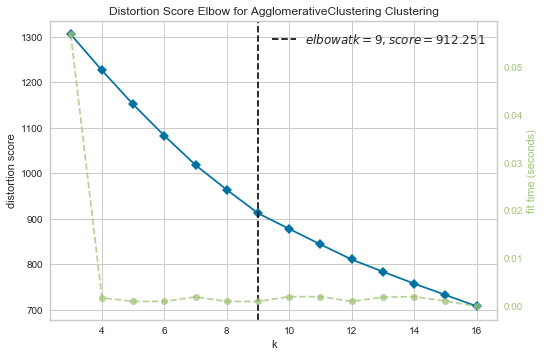

In [21]:
# import libraries
from sklearn.cluster import AgglomerativeClustering

# plot elbow curve
agg_cluster = AgglomerativeClustering()
visualizer = KElbowVisualizer(agg_cluster, k=(3,17))
visualizer.fit(X_std_km)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [22]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

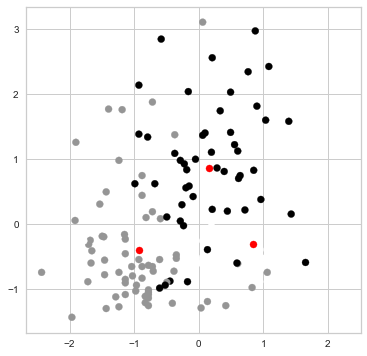

In [29]:
# plot scatter matrix
plt.figure(figsize=(6,6))
plt.scatter(X_std_km[:, 0], X_std_km[:, 1], c=preds_ss)

plt.scatter(centers_ss[:, 0], centers_ss[:, 1], c='red', s=50)#, alpha=0.75)

plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [36]:
# import libraries
from sklearn.decomposition import PCA, FastICA

# create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# conduct PCA
features_pca = pca.fit_transform(X_std_km)

In [37]:
# show results
print("Original number of features:", X_std_km.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 13
Reduced number of features: 12


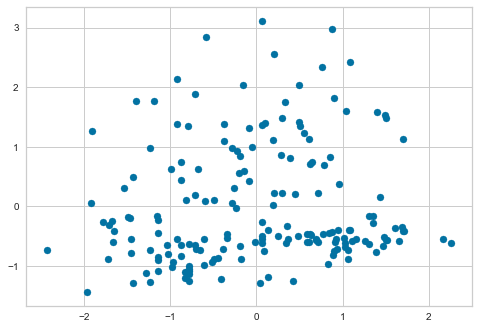

In [38]:
plt.scatter(X_std_km[:, 0], X_std_km[:, 1])

In [39]:
'''
I'm not sure if I did it right because I can't see any cluster.
'''

"\nI'm not sure if I did it right because I can't see any cluster.\n"

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.